In [231]:
import importlib, sys
import numpy as np
import pandas as pd
import seaborn as sns

path_to_functions_directory = r'C:\Users\owysocky\Documents\GitHub\CCE_scGeneRAI\source'
if path_to_functions_directory not in sys.path:
    sys.path.append(path_to_functions_directory)
    
import dataloaders as dtl
importlib.reload(dtl)

import functions_graphs as fg
importlib.reload(fg)

import LRPGraph_code as lrpgraph
importlib.reload(lrpgraph)

<module 'LRPGraph_code' from 'c:\\Users\\owysocky\\Documents\\GitHub\\CCE_scGeneRAI\\source\\LRPGraph_code.py'>

In [232]:
path_to_metadata = r"G:\My Drive\SAFE_AI\CCE_DART\KI_dataset\data_to_BRCA_model\CCE_clinical_features.csv"
path_to_LRP_data = r"G:\My Drive\SAFE_AI\CCE_DART\scGeneRAI_results\model_BRCA_20230904\results_all_samples\LRP_individual_top1000_noexpexp_T.csv"


# Upload LRP data

In [233]:
lrp_df = dtl.LRPData(file_path=path_to_LRP_data, delimiter=",").read_and_validate()
lrp_df.head()

,ATM_del - ARHGEF12_exp,CDH1_del - ARHGEF12_exp,CHEK1_del - ARHGEF12_exp,CTCF_del - ARHGEF12_exp,EED_del - ARHGEF12_exp,SDHD_del - ARHGEF12_exp,WRN_del - ARHGEF12_exp,ZBTB16_del - ARHGEF12_exp,CASP9_del - CAMTA1_exp,CDH1_del - CAMTA1_exp,...,ZFHX3_exp - WRN_del,XPA_exp - XPA_del,YWHAE_exp - YWHAE_del,ZEB1_exp - YWHAE_del,ZFHX3_exp - ZBTB16_del,ZEB1_exp - ZBTB16_del,ZNRF3_exp - ZFHX3_del,ZFHX3_exp - ZFHX3_del,ZNRF3_exp - ZNRF3_del,ZRSR2_exp - ZNRF3_del
TCGA-EW-A1P0,0.003600,0.002842,0.003573,0.002281,0.002181,0.002803,0.002911,0.002442,0.003154,0.001045,...,0.003134,0.000627,0.000680,0.001176,0.004720,0.001910,0.002537,0.006317,0.004410,0.003339
TCGA-BH-A0B3,0.002010,0.001374,0.001755,0.001051,0.000484,0.001430,0.001755,0.001285,0.003212,0.001480,...,0.000537,0.004764,0.000678,0.002345,0.001644,0.003142,0.002546,0.003529,0.004997,0.001317
TCGA-E9-A1R2,0.003130,0.000624,0.001181,0.001385,0.001804,0.002789,0.002723,0.002569,0.005035,0.001846,...,0.001201,0.000827,0.003885,0.001145,0.002952,0.000343,0.002061,0.001458,0.002289,0.003931
TCGA-B6-A0RT,0.002668,0.001375,0.001460,0.000406,0.002273,0.001106,0.002952,0.002123,0.002173,0.000765,...,0.001425,0.002415,0.001129,0.001087,0.001110,0.000666,0.000923,0.001010,0.002354,0.002963
TCGA-XX-A89A,0.005561,0.000896,0.003424,0.001668,0.003869,0.004577,0.004238,0.006129,0.007054,0.007038,...,0.001654,0.000466,0.004379,0.004830,0.002708,0.004427,0.003214,0.002202,0.005583,0.002046


# Upload metadata

In [234]:

# laod metadata
metadata_df = dtl.MetaData(file_path=path_to_metadata, delimiter=",")
metadata_df.load_data()
metadata_df.match_index_with_lrp_df(lrp_df)
metadata_df.validate_data_indices(lrp_df)

metadata_df.summarize()

,Column Name,Data Type,Missing Values,Unique Values,Categories,Parameter Type
0,acronym,object,0,1,[BRCA],Categorical
1,tumor_tissue_site,object,0,1,[Breast],Categorical
2,response,int64,0,1,NaN,Integer
3,HER2,object,0,6,"[Negative, Equivocal, [Not Evaluated], Positiv...",Categorical
4,Estrogen_receptor,object,0,4,"[Positive, Negative, [Not Evaluated], Indeterm...",Categorical
5,Progesterone_receptor,object,0,4,"[Negative, Positive, [Not Evaluated], Indeterm...",Categorical


# Select set of genes (nodes) of interest

In [235]:

#keywords = ["ARHGEF12", "CHEK1", "BRCA1"]
keywords = None

filtered_df = fg.filter_columns_by_keywords(lrp_df, keywords)
filtered_df.head()

,ATM_del - ARHGEF12_exp,CDH1_del - ARHGEF12_exp,CHEK1_del - ARHGEF12_exp,CTCF_del - ARHGEF12_exp,EED_del - ARHGEF12_exp,SDHD_del - ARHGEF12_exp,WRN_del - ARHGEF12_exp,ZBTB16_del - ARHGEF12_exp,CASP9_del - CAMTA1_exp,CDH1_del - CAMTA1_exp,...,ZFHX3_exp - WRN_del,XPA_exp - XPA_del,YWHAE_exp - YWHAE_del,ZEB1_exp - YWHAE_del,ZFHX3_exp - ZBTB16_del,ZEB1_exp - ZBTB16_del,ZNRF3_exp - ZFHX3_del,ZFHX3_exp - ZFHX3_del,ZNRF3_exp - ZNRF3_del,ZRSR2_exp - ZNRF3_del
TCGA-EW-A1P0,0.003600,0.002842,0.003573,0.002281,0.002181,0.002803,0.002911,0.002442,0.003154,0.001045,...,0.003134,0.000627,0.000680,0.001176,0.004720,0.001910,0.002537,0.006317,0.004410,0.003339
TCGA-BH-A0B3,0.002010,0.001374,0.001755,0.001051,0.000484,0.001430,0.001755,0.001285,0.003212,0.001480,...,0.000537,0.004764,0.000678,0.002345,0.001644,0.003142,0.002546,0.003529,0.004997,0.001317
TCGA-E9-A1R2,0.003130,0.000624,0.001181,0.001385,0.001804,0.002789,0.002723,0.002569,0.005035,0.001846,...,0.001201,0.000827,0.003885,0.001145,0.002952,0.000343,0.002061,0.001458,0.002289,0.003931
TCGA-B6-A0RT,0.002668,0.001375,0.001460,0.000406,0.002273,0.001106,0.002952,0.002123,0.002173,0.000765,...,0.001425,0.002415,0.001129,0.001087,0.001110,0.000666,0.000923,0.001010,0.002354,0.002963
TCGA-XX-A89A,0.005561,0.000896,0.003424,0.001668,0.003869,0.004577,0.004238,0.006129,0.007054,0.007038,...,0.001654,0.000466,0.004379,0.004830,0.002708,0.004427,0.003214,0.002202,0.005583,0.002046


Prepare dataframe to create graphs: columns = samples, index = edges

In [236]:
LRP_to_graphs = fg.prepare_lrp_to_graphs(filtered_df)
LRP_to_graphs.head()

,index,TCGA-EW-A1P0,TCGA-BH-A0B3,TCGA-E9-A1R2,TCGA-B6-A0RT,TCGA-XX-A89A,TCGA-A2-A0SY,TCGA-A8-A092,TCGA-A7-A6VY,TCGA-A2-A3XW,...,TCGA-D8-A27E,TCGA-A2-A1G4,TCGA-D8-A1X7,TCGA-AR-A0U3,TCGA-E9-A1ND,TCGA-D8-A1XL,TCGA-BH-A0W5,TCGA-E9-A229,source_node,target_node
0,ATM_del - ARHGEF12_exp,0.003600,0.002010,0.003130,0.002668,0.005561,0.004544,0.000783,0.006071,0.005951,...,0.004262,0.002108,0.002555,0.002109,0.003015,0.003745,0.001467,0.001972,ATM_del,ARHGEF12_exp
1,CDH1_del - ARHGEF12_exp,0.002842,0.001374,0.000624,0.001375,0.000896,0.000725,0.000275,0.001791,0.001912,...,0.006059,0.001122,0.006837,0.001182,0.001451,0.000927,0.001847,0.000628,CDH1_del,ARHGEF12_exp
2,CHEK1_del - ARHGEF12_exp,0.003573,0.001755,0.001181,0.001460,0.003424,0.003044,0.001806,0.005017,0.004813,...,0.003507,0.001826,0.003578,0.002327,0.002488,0.004477,0.001632,0.001476,CHEK1_del,ARHGEF12_exp
3,CTCF_del - ARHGEF12_exp,0.002281,0.001051,0.001385,0.000406,0.001668,0.001552,0.000757,0.002404,0.000865,...,0.005884,0.001180,0.005413,0.001486,0.000928,0.000492,0.001488,0.001202,CTCF_del,ARHGEF12_exp
4,EED_del - ARHGEF12_exp,0.002181,0.000484,0.001804,0.002273,0.003869,0.002797,0.000668,0.003728,0.005937,...,0.003148,0.000519,0.003071,0.000769,0.001293,0.003633,0.000986,0.001483,EED_del,ARHGEF12_exp


## Define number of top n strongest edges to build graphs.
 For each graph the top_n edges is calcualted individually.

In [237]:
top_n = 150 # can be None, than all edges will be used

## Create dictionary with graphs for all samples in the dataset

In [238]:

G_dict = fg.get_all_graphs_from_lrp(LRP_to_graphs, top_n)
G_dict

Processing sample 0
Processing sample 1
Processing sample 2
Processing sample 3
Processing sample 4
Processing sample 5
Processing sample 6
Processing sample 7
Processing sample 8
Processing sample 9
Processing sample 10
Processing sample 11
Processing sample 12
Processing sample 13
Processing sample 14
Processing sample 15
Processing sample 16
Processing sample 17
Processing sample 18
Processing sample 19
Processing sample 20
Processing sample 21
Processing sample 22
Processing sample 23
Processing sample 24
Processing sample 25
Processing sample 26
Processing sample 27
Processing sample 28
Processing sample 29
Processing sample 30
Processing sample 31
Processing sample 32
Processing sample 33
Processing sample 34
Processing sample 35
Processing sample 36
Processing sample 37
Processing sample 38
Processing sample 39
Processing sample 40
Processing sample 41
Processing sample 42
Processing sample 43
Processing sample 44
Processing sample 45
Processing sample 46
Processing sample 47
Pr

{0: <LRPGraph_code.LRPGraph at 0x291070d4650>,
 1: <LRPGraph_code.LRPGraph at 0x29107055f50>,
 2: <LRPGraph_code.LRPGraph at 0x28f398a1d50>,
 3: <LRPGraph_code.LRPGraph at 0x2907d8242d0>,
 4: <LRPGraph_code.LRPGraph at 0x29105383b10>,
 5: <LRPGraph_code.LRPGraph at 0x2907d824610>,
 6: <LRPGraph_code.LRPGraph at 0x2907ad027d0>,
 7: <LRPGraph_code.LRPGraph at 0x2910744c190>,
 8: <LRPGraph_code.LRPGraph at 0x2910744c0d0>,
 9: <LRPGraph_code.LRPGraph at 0x28f39dd5e90>,
 10: <LRPGraph_code.LRPGraph at 0x2910742bdd0>,
 11: <LRPGraph_code.LRPGraph at 0x2910742bf50>,
 12: <LRPGraph_code.LRPGraph at 0x29107062a90>,
 13: <LRPGraph_code.LRPGraph at 0x29105435b10>,
 14: <LRPGraph_code.LRPGraph at 0x2910745a090>,
 15: <LRPGraph_code.LRPGraph at 0x29107103f90>,
 16: <LRPGraph_code.LRPGraph at 0x291074404d0>,
 17: <LRPGraph_code.LRPGraph at 0x28fef90be10>,
 18: <LRPGraph_code.LRPGraph at 0x29107121d90>,
 19: <LRPGraph_code.LRPGraph at 0x29107459d90>,
 20: <LRPGraph_code.LRPGraph at 0x28f39e8ec50>,
 2

In [239]:
G_dict[0].sample_ID

'TCGA-EW-A1P0'

In [240]:
G_dict[1].G.nodes

NodeView(('TPM3_exp', 'ARID1A_del', 'SDHB_del', 'FOXA1_exp', 'APC_del', 'ID3_del', 'RAD50_del', 'B2M_del', 'MYH9_del', 'SPEN_del', 'RIT1_exp', 'CAMTA1_del', 'RPL22_del', 'CASP9_del', 'ZNRF3_del', 'CBFB_del', 'BCL10_del', 'RPL22_exp', 'PATZ1_exp', 'LZTR1_del', 'CHD2_del', 'MAX_del', 'RPL5_del', 'CLTCL1_del', 'MYB_exp', 'IDH2_exp', 'BRCA1_del', 'PATZ1_del', 'CDKN2A_exp', 'YWHAE_del', 'ETNK1_exp', 'SLC34A2_del', 'CHEK2_del', 'RAD17_exp', 'N4BP2_del', 'SMARCB1_del', 'SPOP_del', 'PPP6C_del', 'CCNB1IP1_del', 'BAZ1A_del', 'EP300_del', 'TRIM33_del', 'BCL2_exp', 'MDM4_exp', 'CDKN2C_del', 'SMAD2_del', 'RB1_exp', 'RB1_del', 'NF2_del', 'CASP3_del', 'BRD3_exp', 'KMT2D_del', 'ERBB3_exp', 'PML_exp', 'CTCF_del', 'MGMT_del', 'PRDM2_del', 'CASP9_exp', 'RAD17_del', 'CPEB3_exp', 'TP53_del', 'ACVR1B_del', 'RFWD3_del', 'PPP6C_exp', 'MAP3K1_del', 'MUTYH_del', 'ZFHX3_del', 'ZNRF3_exp', 'PHOX2B_del', 'CDH1_del', 'EPS15_del', 'ARHGEF10L_del', 'MYD88_exp', 'NF1_del', 'ERBB2_exp', 'ESR1_exp', 'NDRG1_exp', 'EP300_

In [241]:
G_dict[1].G.edges


EdgeView([('TPM3_exp', 'ARID1A_del'), ('TPM3_exp', 'SDHB_del'), ('TPM3_exp', 'ID3_del'), ('TPM3_exp', 'B2M_del'), ('TPM3_exp', 'MYH9_del'), ('TPM3_exp', 'SPEN_del'), ('TPM3_exp', 'CAMTA1_del'), ('TPM3_exp', 'RPL22_del'), ('TPM3_exp', 'CASP9_del'), ('TPM3_exp', 'ZNRF3_del'), ('TPM3_exp', 'BCL10_del'), ('TPM3_exp', 'CHD2_del'), ('TPM3_exp', 'RPL5_del'), ('TPM3_exp', 'CLTCL1_del'), ('TPM3_exp', 'PATZ1_del'), ('TPM3_exp', 'TRIM33_del'), ('TPM3_exp', 'CDKN2C_del'), ('ARID1A_del', 'RPL22_exp'), ('ARID1A_del', 'SDHB_del'), ('ARID1A_del', 'CAMTA1_del'), ('ARID1A_del', 'MDM4_exp'), ('ARID1A_del', 'PRDM2_del'), ('ARID1A_del', 'TNFRSF14_del'), ('SDHB_del', 'RIT1_exp'), ('SDHB_del', 'RPL22_exp'), ('SDHB_del', 'BCL2_exp'), ('SDHB_del', 'CAMTA1_del'), ('SDHB_del', 'PRDM2_del'), ('FOXA1_exp', 'APC_del'), ('FOXA1_exp', 'RAD50_del'), ('FOXA1_exp', 'MAX_del'), ('FOXA1_exp', 'SLC34A2_del'), ('FOXA1_exp', 'PPP6C_del'), ('FOXA1_exp', 'CCNB1IP1_del'), ('FOXA1_exp', 'BAZ1A_del'), ('FOXA1_exp', 'KMT2D_del'), 

In [242]:
# assert that the number of edges is equal to top_n
assert len(G_dict[1].G.edges) == top_n   # number of edges


In [243]:
len(G_dict[1].G.edges), len(G_dict[1].G.nodes)

(150, 92)

## Compute adjecency matrix for each graph that has same size for all graphs
Same size matrix can be easily compared, subtracted etc.

In [244]:
fg.get_all_fixed_size_adjacency_matrices(G_dict)

In [245]:
np.shape(G_dict[1].fixed_size_adjacency_matrix), np.shape(G_dict[2].fixed_size_adjacency_matrix), 

((501, 501), (501, 501))

In [246]:
G_dict[2].all_nodes

['ABL1_exp',
 'ABL2_exp',
 'ACVR1B_del',
 'ACVR1B_exp',
 'ACVR1_exp',
 'ACVR2A_del',
 'ACVR2A_exp',
 'AFF3_exp',
 'AKT1_exp',
 'AKT2_exp',
 'APC_del',
 'ARHGAP26_del',
 'ARHGAP26_exp',
 'ARHGEF10L_del',
 'ARHGEF10L_exp',
 'ARHGEF10_del',
 'ARHGEF10_exp',
 'ARHGEF12_del',
 'ARHGEF12_exp',
 'ARID1A_del',
 'ARID1A_exp',
 'ARID1B_del',
 'ARID2_exp',
 'ARRDC1_exp',
 'AR_exp',
 'ASXL1_exp',
 'ASXL2_exp',
 'ATF1_exp',
 'ATM_del',
 'ATM_exp',
 'AXIN1_exp',
 'AXIN2_exp',
 'B2M_del',
 'B2M_exp',
 'BAP1_del',
 'BARD1_del',
 'BAX_exp',
 'BAZ1A_del',
 'BAZ1A_exp',
 'BCL10_del',
 'BCL10_exp',
 'BCL11A_exp',
 'BCL2_exp',
 'BCL6_exp',
 'BCL9_exp',
 'BCORL1_exp',
 'BCOR_exp',
 'BIRC3_exp',
 'BIRC6_exp',
 'BLM_del',
 'BLM_exp',
 'BRCA1_del',
 'BRCA1_exp',
 'BRCA2_del',
 'BRCA2_exp',
 'BRD3_exp',
 'BRIP1_exp',
 'BTK_mut',
 'BUB1B_del',
 'BUB1B_exp',
 'CACNA1D_exp',
 'CALR_exp',
 'CAMTA1_del',
 'CAMTA1_exp',
 'CARS_del',
 'CARS_exp',
 'CASP3_del',
 'CASP3_exp',
 'CASP8_exp',
 'CASP9_del',
 'CASP9_exp',
 '

In [247]:
# check if the number of all unique nodes in the graphs is equal to the number of nodes in the adjacency matrix
len(G_dict[2].all_nodes) == np.shape(G_dict[1].fixed_size_adjacency_matrix)[1]

True

## Compute same size Laplacian embedding for all graphs

In [248]:
fg.get_all_fixed_size_embeddings(G_dict)

In [249]:
G_dict[1].fixed_size_embedding.shape, G_dict[2].fixed_size_embedding.shape

((501, 2), (501, 2))

# Plot example graph

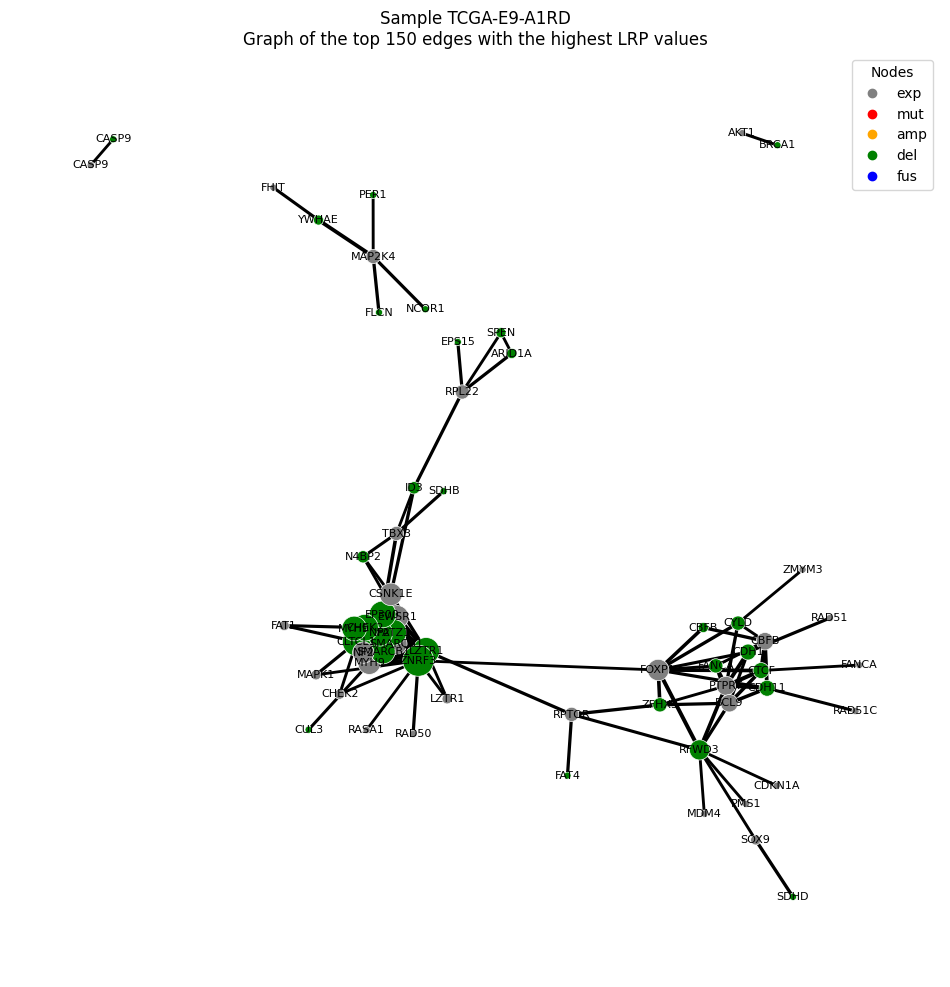

In [250]:
import networkx as nx
import numpy as np
import pandas as pd

i = 20
G = G_dict[i]
node_color_mapper = {'exp': 'gray', 'mut': 'red', 'amp': 'orange', 'del': 'green', 'fus': 'b'}
    

# Example usage
fg.plot_graph(G, node_color_mapper)

# Show 3 most similar samples to mine

In [251]:
G_dict[1].raveled_fixed_size_embedding

array([0., 0., 0., ..., 0., 0., 0.])

In [252]:
# Extract embeddings as one matrix for all graphs
embeddings_df = fg.extract_raveled_fixed_size_embedding_all_graphs(G_dict)

# Print the shape of the resulting matrix
embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,1001
TCGA-EW-A1P0,-0.229416,9.135550e-17,7.562430e-08,-1.103001e-16,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.185969e-22,1.643797e-01,7.562430e-08,7.607995e-19,0.0,0.0
TCGA-BH-A0B3,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.091089e-01,5.742123e-16,0.000000e+00,0.000000e+00,0.0,0.0
TCGA-E9-A1R2,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-1.110810e-16,0.0,0.0
TCGA-B6-A0RT,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,-2.326029e-19,0.000000e+00,0.000000e+00,0.0,0.0
TCGA-XX-A89A,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0


In [253]:
i = 20

sample_ID = lrp_df.index[i]
sample_ID

'TCGA-E9-A1RD'

In [254]:

# Example usage
sorted_distance_df = fg.compute_sorted_distances(embeddings_df, sample_ID)
sorted_distance_df.head()

,Sample,Distance
20,TCGA-E9-A1RD,0.000000
291,TCGA-AC-A23E,1.230653
987,TCGA-E9-A229,1.416465
96,TCGA-AR-A0U0,1.416490
858,TCGA-Z7-A8R6,1.418702


In [255]:
top_n_similar = 3

# Get the top n most similar samples
top_n_samples = sorted_distance_df.head(top_n_similar+1)

top_n_samples




,Sample,Distance
20,TCGA-E9-A1RD,0.000000
291,TCGA-AC-A23E,1.230653
987,TCGA-E9-A229,1.416465
96,TCGA-AR-A0U0,1.416490


TCGA-E9-A1RD
TCGA-AC-A23E
TCGA-E9-A229
TCGA-AR-A0U0


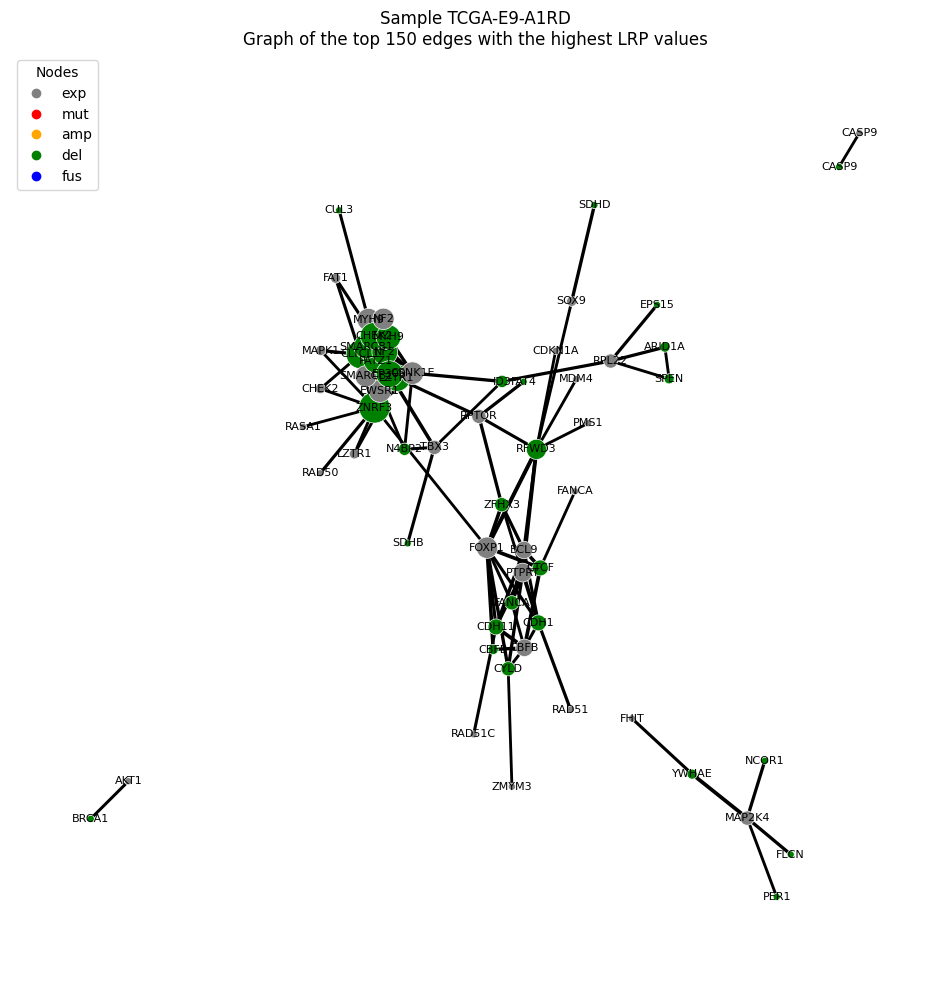

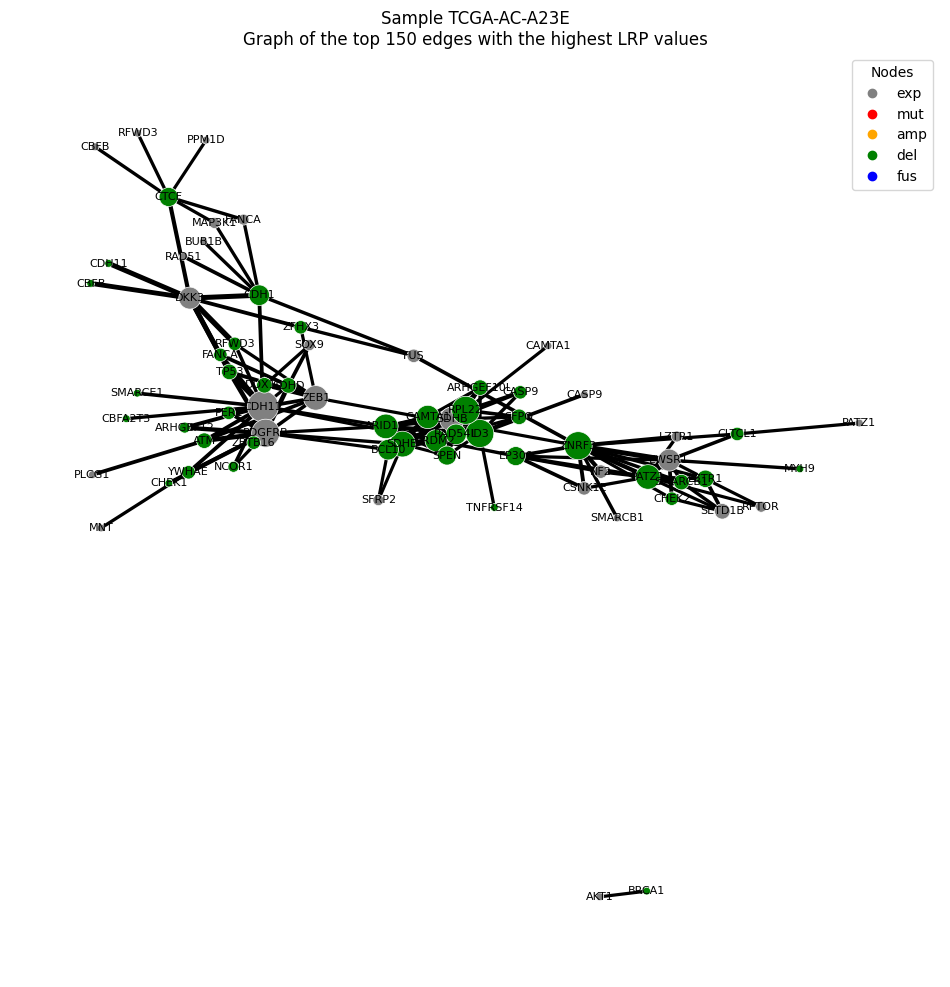

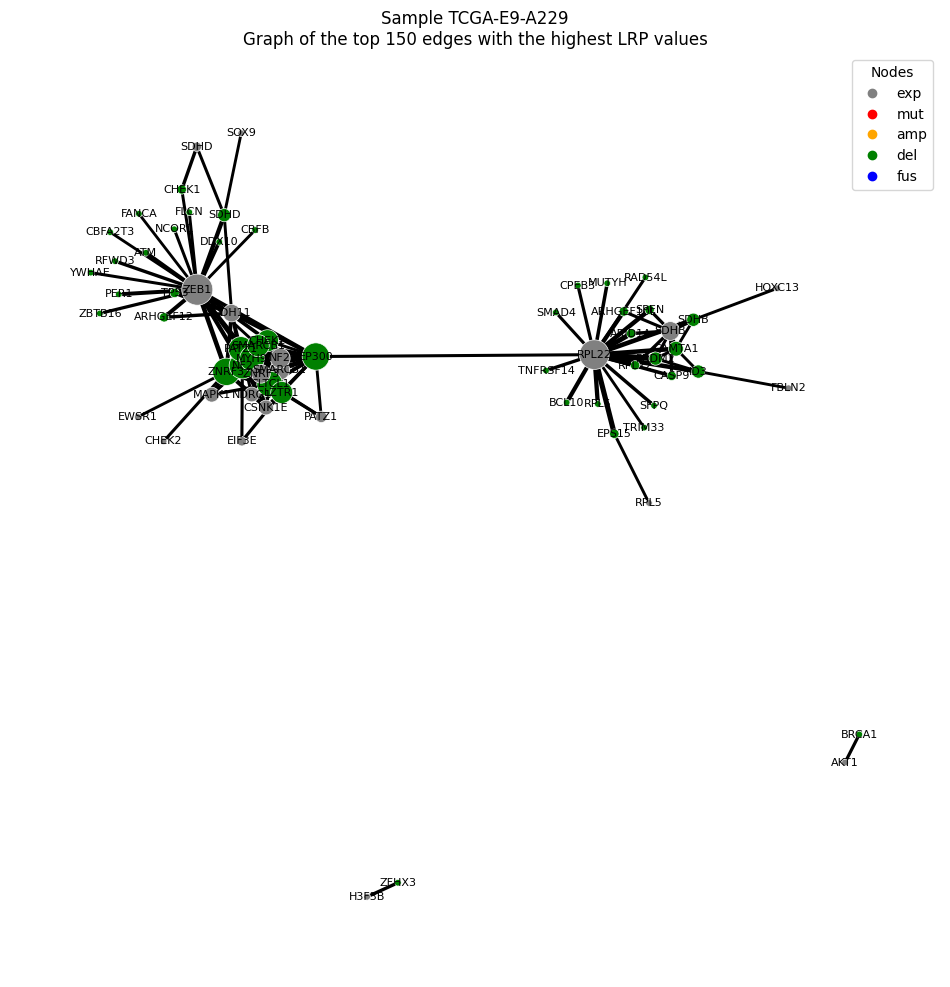

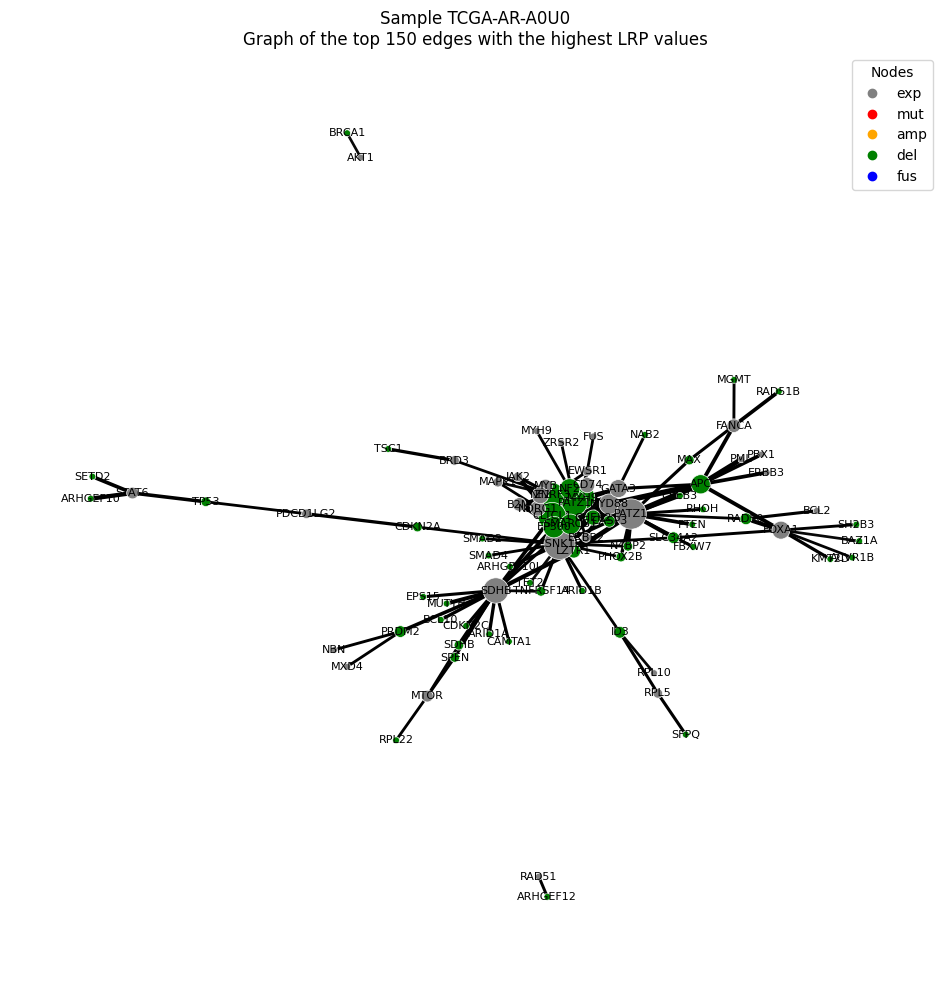

In [256]:
# use fg.plot_graph and plot the top_n_similar samples
for i in range(top_n_similar+1):
    sample_ID = top_n_samples.iloc[i, 0]
    G = next(G for G in G_dict.values() if G.sample_ID == sample_ID)
    fg.plot_graph(G, node_color_mapper)
    print(sample_ID)

# Compare 2 groups of samples

In [257]:
stratify_by = "HER2"
metadata_df.data[stratify_by].unique()

array(['Negative', 'Equivocal', '[Not Evaluated]', 'Positive',
       '[Not Available]', 'Indeterminate'], dtype=object)

In [258]:
LRP_to_graphs_stratified = fg.split_and_aggregate_lrp(LRP_to_graphs, metadata_df.data, stratify_by, agg_func="mean")
LRP_to_graphs_stratified

,index,source_node,target_node,Equivocal,Indeterminate,Negative,Positive,[Not Available],[Not Evaluated]
0,ATM_del - ARHGEF12_exp,ATM_del,ARHGEF12_exp,0.002802,0.003154,0.002588,0.002714,0.001987,0.002971
1,CDH1_del - ARHGEF12_exp,CDH1_del,ARHGEF12_exp,0.001351,0.001261,0.001462,0.001107,0.002023,0.001504
2,CHEK1_del - ARHGEF12_exp,CHEK1_del,ARHGEF12_exp,0.002375,0.003205,0.002340,0.002324,0.002022,0.002674
3,CTCF_del - ARHGEF12_exp,CTCF_del,ARHGEF12_exp,0.001522,0.001208,0.001657,0.001359,0.002252,0.001678
4,EED_del - ARHGEF12_exp,EED_del,ARHGEF12_exp,0.001963,0.002237,0.001805,0.002036,0.001645,0.002176
...,...,...,...,...,...,...,...,...,...
3535,ZEB1_exp - ZBTB16_del,ZEB1_exp,ZBTB16_del,0.003255,0.002851,0.003037,0.002773,0.002730,0.003411
3536,ZNRF3_exp - ZFHX3_del,ZNRF3_exp,ZFHX3_del,0.002196,0.002642,0.002211,0.002039,0.001850,0.002217
3537,ZFHX3_exp - ZFHX3_del,ZFHX3_exp,ZFHX3_del,0.003392,0.003709,0.003270,0.003313,0.002774,0.003748
3538,ZNRF3_exp - ZNRF3_del,ZNRF3_exp,ZNRF3_del,0.003872,0.004258,0.004030,0.003799,0.003706,0.004043


In [259]:

# filted LRP_to_graphs_stratified selecting only group1 and group2
group1 = "Positive"
group2 = "Negative"
LRP_to_graphs_stratified_12 = LRP_to_graphs_stratified[['index','source_node', 'target_node', group1, group2]]
LRP_to_graphs_stratified_12

,index,source_node,target_node,Positive,Negative
0,ATM_del - ARHGEF12_exp,ATM_del,ARHGEF12_exp,0.002714,0.002588
1,CDH1_del - ARHGEF12_exp,CDH1_del,ARHGEF12_exp,0.001107,0.001462
2,CHEK1_del - ARHGEF12_exp,CHEK1_del,ARHGEF12_exp,0.002324,0.002340
3,CTCF_del - ARHGEF12_exp,CTCF_del,ARHGEF12_exp,0.001359,0.001657
4,EED_del - ARHGEF12_exp,EED_del,ARHGEF12_exp,0.002036,0.001805
...,...,...,...,...,...
3535,ZEB1_exp - ZBTB16_del,ZEB1_exp,ZBTB16_del,0.002773,0.003037
3536,ZNRF3_exp - ZFHX3_del,ZNRF3_exp,ZFHX3_del,0.002039,0.002211
3537,ZFHX3_exp - ZFHX3_del,ZFHX3_exp,ZFHX3_del,0.003313,0.003270
3538,ZNRF3_exp - ZNRF3_del,ZNRF3_exp,ZNRF3_del,0.003799,0.004030


In [260]:
top_n = 30
G_dict12 = fg.get_all_graphs_from_lrp(LRP_to_graphs_stratified_12, top_n)

fg.get_all_fixed_size_adjacency_matrices(G_dict12)
fg.get_all_fixed_size_embeddings(G_dict12)

Processing sample 0
Processing sample 1


## plot 2 graphs with avearge LRP values

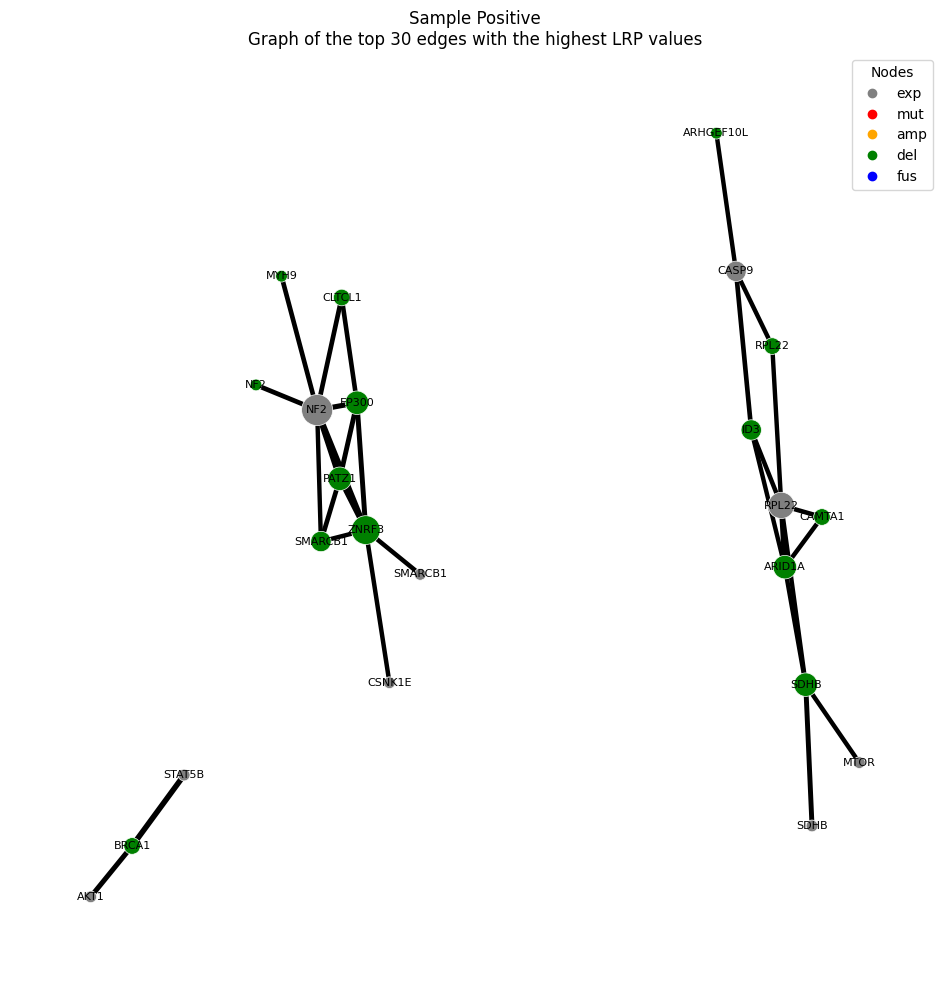

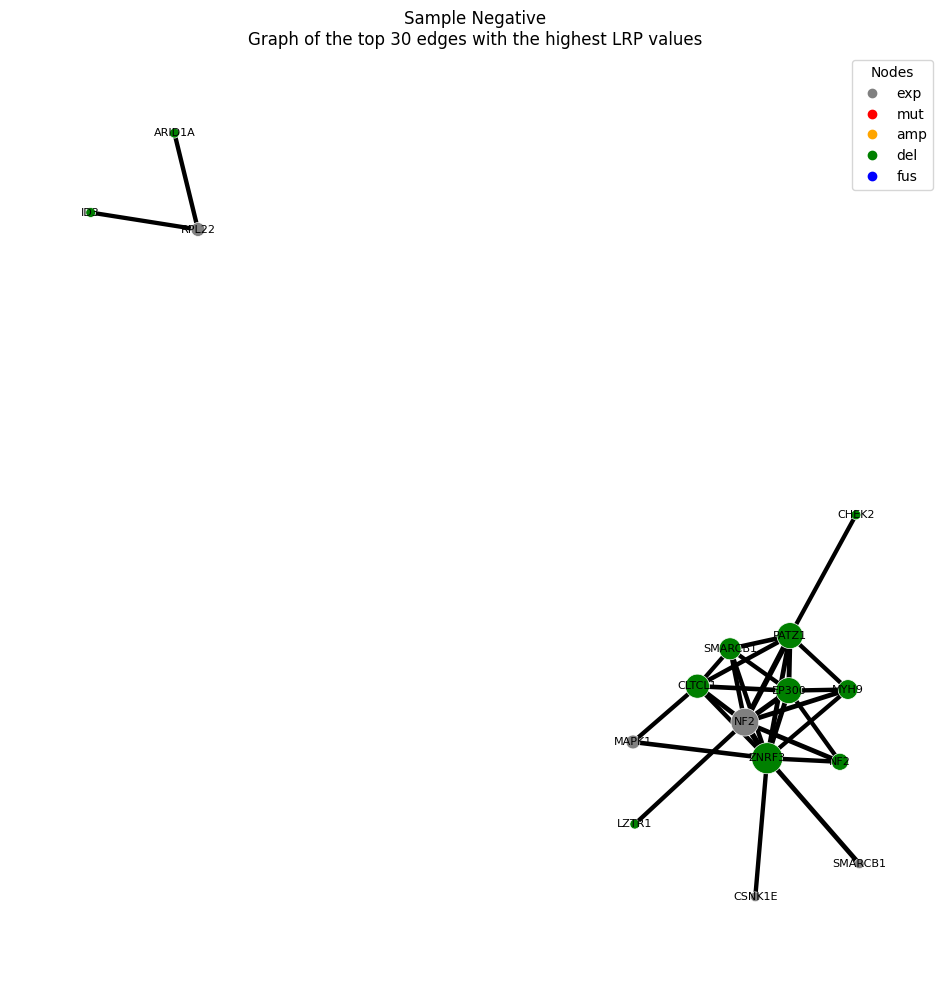

In [261]:
fg.plot_graph(G_dict12[0], node_color_mapper)
fg.plot_graph(G_dict12[1], node_color_mapper)

## investigate differences between graphs

In [262]:
# get the adjacency matrices
adj1 = G_dict12[0].fixed_size_adjacency_matrix
adj2 = G_dict12[1].fixed_size_adjacency_matrix

In [263]:
adj1

array([[0.        , 0.        , 0.        , 0.90459479, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.79411616, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.81015636,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.79405755, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.90884316,
      

In [264]:
adj_diff = fg.calculate_adjacency_difference(G_dict12[0], G_dict12[1])
adj_diff

,AKT1_exp,ARHGEF10L_del,ARID1A_del,BRCA1_del,CAMTA1_del,CASP9_exp,CHEK2_del,CLTCL1_del,CSNK1E_exp,EP300_del,...,NF2_exp,PATZ1_del,RPL22_del,RPL22_exp,SDHB_del,SDHB_exp,SMARCB1_del,SMARCB1_exp,STAT5B_exp,ZNRF3_del
AKT1_exp,0.000000,0.000000,0.000000,0.904595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
ARHGEF10L_del,0.000000,0.000000,0.000000,0.000000,0.000000,0.794116,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
ARID1A_del,0.000000,0.000000,0.000000,0.000000,0.810156,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.120703,0.799998,0.000000,0.000000,0.000000,0.0,0.000000
BRCA1_del,0.904595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
CAMTA1_del,0.000000,0.000000,0.810156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.814102,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
CASP9_exp,0.000000,0.794116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.799624,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
CHEK2_del,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.766567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
CLTCL1_del,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.003870,...,-0.026728,-0.806307,0.000000,0.000000,0.000000,0.000000,-0.768540,0.000000,0.0,-0.785271
CSNK1E_exp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.016896
EP300_del,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.003870,0.000000,0.000000,...,0.007429,-0.001180,0.000000,0.000000,0.000000,0.000000,-0.776337,0.000000,0.0,0.015704


In [265]:
diff_thres = 0.8
edge_df = fg.create_edge_dataframe_from_adj_diff(adj_diff, diff_thres)
edge_df

,edge,source_node,target_node,LRP,LRP_norm
0,AKT1_exp - BRCA1_del,AKT1_exp,BRCA1_del,0.904595,0.904595
1,ARID1A_del - CAMTA1_del,ARID1A_del,CAMTA1_del,0.810156,0.810156
2,BRCA1_del - AKT1_exp,BRCA1_del,AKT1_exp,0.904595,0.904595
3,BRCA1_del - STAT5B_exp,BRCA1_del,STAT5B_exp,1.000000,1.000000
4,CAMTA1_del - ARID1A_del,CAMTA1_del,ARID1A_del,0.810156,0.810156
5,CAMTA1_del - RPL22_exp,CAMTA1_del,RPL22_exp,0.814102,0.814102
6,CASP9_exp - ID3_del,CASP9_exp,ID3_del,0.834717,0.834717
7,ID3_del - CASP9_exp,ID3_del,CASP9_exp,0.834717,0.834717
8,MTOR_exp - SDHB_del,MTOR_exp,SDHB_del,0.807725,0.807725
9,RPL22_exp - CAMTA1_del,RPL22_exp,CAMTA1_del,0.814102,0.814102


<Axes: >

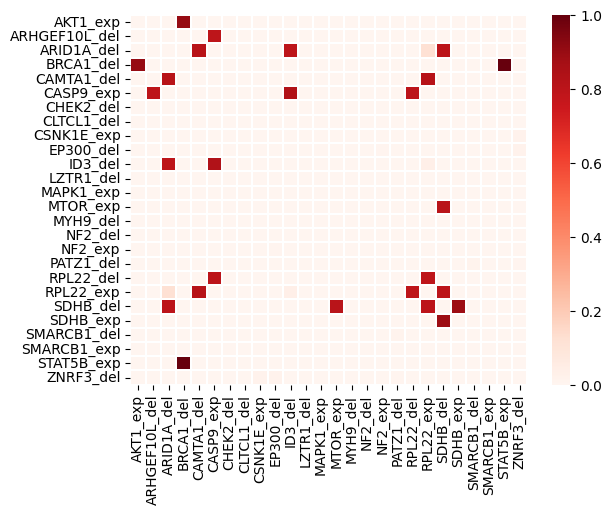

In [266]:
# show all differences
sns.heatmap(adj_diff, xticklabels=1, yticklabels=1, linewidths=0.2, cmap='Reds', vmin = 0, vmax = 1)


<Axes: >

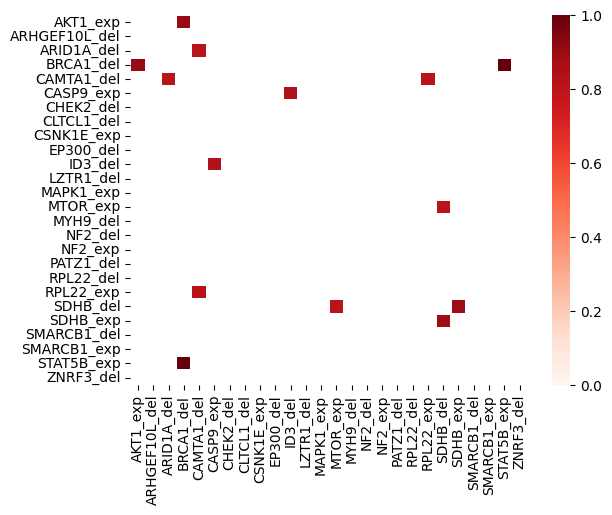

In [267]:
# show only differences above the threshold
sns.heatmap(adj_diff, xticklabels=1, yticklabels=1, linewidths=0.2, cmap='Reds', vmin = 0, vmax = 1, mask = adj_diff < diff_thres)


In [268]:
# create a graph from the edge_df
diff_graph = lrpgraph.LRPGraph(
            edges_sample_i=edge_df,
            source_column="source_node",
            target_column="target_node",
            edge_attrs=["LRP", "LRP_norm"],
            top_n_edges = None,
            sample_ID = 'DIFFERENCE POS vs NEG',
        )

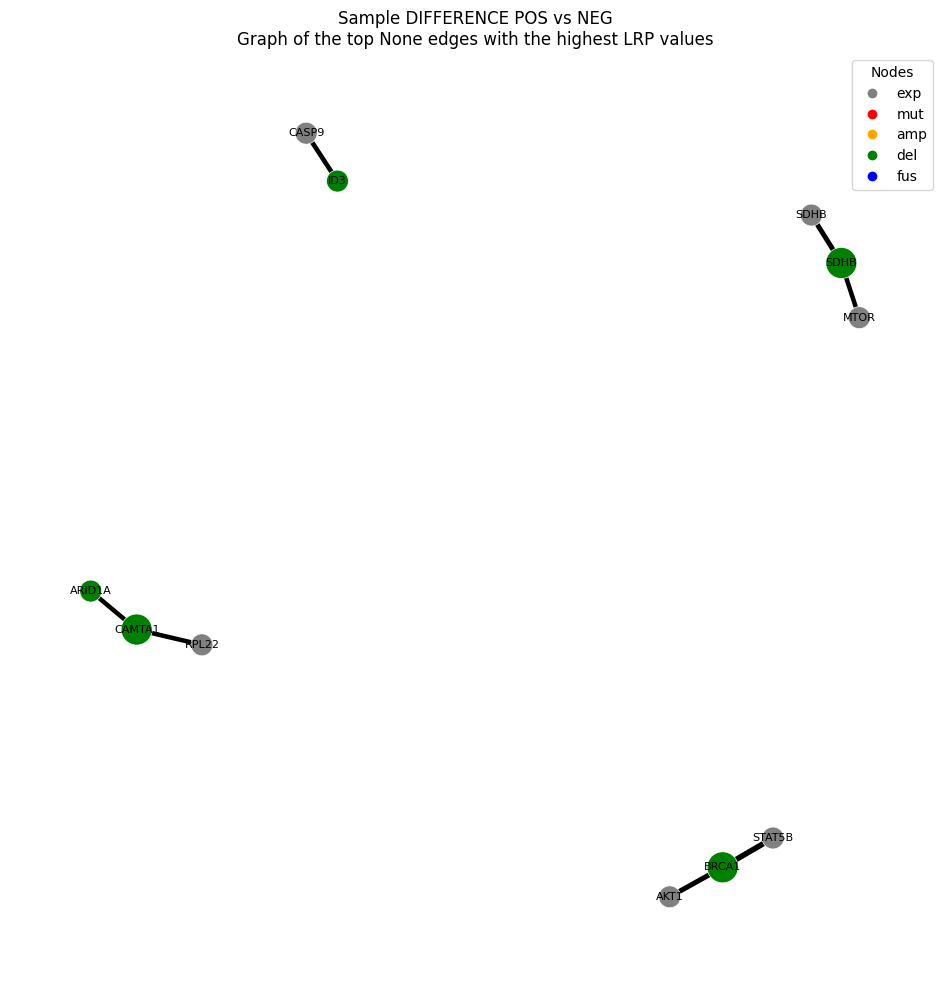

In [269]:
fg.plot_graph(diff_graph, node_color_mapper)

# show graph nodes

